# Pinecone - vector DB
- Vector db is optimized for storing, indexing and retrieving vector data
- Pinecone is a cloud based vector Db service
- 3 Components of pinecone db :-
    1. Index (enables efficient searching and retrieval of vectors)
    2. Namespace (provides a way to organize and group the vectors)
    3. Vector (Core representation of data)
  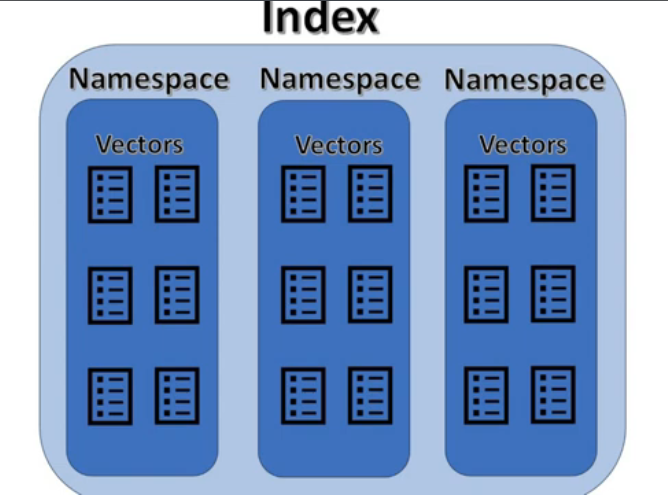

# Example 1

## Initialize the connection

In [2]:
from pinecone import Pinecone, ServerlessSpec
pc = Pinecone(api_key="Your_API_Key")

## Create an Index

In [4]:
# Create an index with the given parameters if the given index is not present
index_name = "test-index"

if not pc.has_index(index_name):
  pc.create_index(
      name=index_name,
      dimension=8,
      metric="cosine",
      spec = ServerlessSpec(cloud="aws", region="us-east-1")
  )

print(pc.describe_index(index_name))

{'deletion_protection': 'disabled',
 'dimension': 8,
 'host': 'test-index-ii4vgbv.svc.aped-4627-b74a.pinecone.io',
 'metric': 'cosine',
 'name': 'test-index',
 'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
 'status': {'ready': True, 'state': 'Ready'},
 'tags': None,
 'vector_type': 'dense'}


## Insert vectors

In [6]:
index = pc.Index("test-index")

index.upsert(
    vectors=[
        {"id":"vec1", "values":[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]},
        {"id":"vec2", "values":[0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]},
        {"id":"vec3", "values":[0.3, 0.3, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1]},
        {"id":"vec4", "values":[0.4, 0.4, 0.4, 0.4, 0.1, 0.1, 0.1, 0.1]}
    ],
    namespace="ns1"
)

index.upsert(
    vectors=[
        {"id":"vec5", "values":[0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]},
        {"id":"vec6", "values":[0.6, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]},
        {"id":"vec7", "values":[0.7, 0.3, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1]},
        {"id":"vec8", "values":[0.8, 0.4, 0.4, 0.4, 0.1, 0.1, 0.1, 0.1]}
    ],
    namespace="ns2"
)

{'upserted_count': 4}

In [8]:
index.fetch(["vec1", "vec2"], "ns1")

FetchResponse(namespace='ns1', vectors={'vec1': Vector(id='vec1', values=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], metadata=None, sparse_values=None), 'vec2': Vector(id='vec2', values=[0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], metadata=None, sparse_values=None)}, usage={'read_units': 1})

## Update vectors

In [9]:
# Full update
index.upsert([("vec3", [3.3, 0.3, 2.1, 0.1, 5.1, 7.8, 8.1, 0.1])], "ns1")

{'upserted_count': 1}

In [10]:
# Partial update
index.update(id="vec2", values=[0.1, 2.1, 0.1, 6.1, 0.1, 5.1, 0.1, 0.1], set_metadata={"type":"web", "new":True}, namespace="ns1")

{}

## Deleting vectors

In [11]:
# Delete vectors
index.delete(ids=["vec1", "vec4"], namespace='ns1')

{}

In [12]:
# Delete entire namespace
index.delete(delete_all=True, namespace="ns2")

{}

# Example 2

## Initialize the connection

In [13]:
pc = Pinecone(api_key="Your_API_Key")

## Create an index

In [14]:
# Create an index with the given parameters if the given index is not present
index_name = "test-index-2"

if not pc.has_index(index_name):
  pc.create_index_for_model(
      name=index_name,
      cloud="aws",
      region="us-east-1",
      embed={
          "model":"llama-text-embed-v2",
          "field_map":{"text": "chunk_text"}
      }
  )

print(pc.describe_index(index_name))

{'deletion_protection': 'disabled',
 'dimension': 1024,
 'embed': {'dimension': 1024,
           'field_map': {'text': 'chunk_text'},
           'metric': 'cosine',
           'model': 'llama-text-embed-v2',
           'read_parameters': {'dimension': 1024.0,
                               'input_type': 'query',
                               'truncate': 'END'},
           'vector_type': 'dense',
           'write_parameters': {'dimension': 1024.0,
                                'input_type': 'passage',
                                'truncate': 'END'}},
 'host': 'test-index-2-ii4vgbv.svc.aped-4627-b74a.pinecone.io',
 'metric': 'cosine',
 'name': 'test-index-2',
 'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
 'status': {'ready': True, 'state': 'Ready'},
 'tags': None,
 'vector_type': 'dense'}


## Insert data

In [15]:
# Upsert data into a new ns1 namespace in the index
index = pc.Index(index_name)

index.upsert_records(
    records=[
        { "_id": "rec1", "chunk_text": "The Eiffel Tower was completed in 1889 and stands in Paris, France.", "category": "history" },
        { "_id": "rec2", "chunk_text": "Photosynthesis allows plants to convert sunlight into energy.", "category": "science" },
        { "_id": "rec3", "chunk_text": "Albert Einstein developed the theory of relativity.", "category": "science" },
        { "_id": "rec4", "chunk_text": "The mitochondrion is often called the powerhouse of the cell.", "category": "biology" },
        { "_id": "rec5", "chunk_text": "Shakespeare wrote many famous plays, including Hamlet and Macbeth.", "category": "literature" },
        { "_id": "rec6", "chunk_text": "Water boils at 100°C under standard atmospheric pressure.", "category": "physics" },
        { "_id": "rec7", "chunk_text": "The Great Wall of China was built to protect against invasions.", "category": "history" },
        { "_id": "rec8", "chunk_text": "Honey never spoils due to its low moisture content and acidity.", "category": "food science" },
        { "_id": "rec9", "chunk_text": "The speed of light in a vacuum is approximately 299,792 km/s.", "category": "physics" },
        { "_id": "rec10", "chunk_text": "Newton's laws describe the motion of objects.", "category": "physics" }
    ],
    namespace="ns1"
)

In [16]:
index.fetch(["rec1"], "ns1")

FetchResponse(namespace='ns1', vectors={'rec1': Vector(id='rec1', values=[0.0467529297, -0.0228271484, -0.0230102539, -0.051574707, -0.00354385376, 0.00969696, 0.00608825684, 0.00244903564, -0.0681152344, 0.033203125, 0.0115280151, -0.00942993164, -0.0365600586, -0.0243377686, -0.0370178223, 0.0285797119, 0.0107192993, -0.00907135, 0.0182800293, -0.0382995605, -0.041229248, 0.0386047363, 0.00587081909, -0.017288208, -0.0569458, -0.0811157227, 0.018081665, -0.0189361572, 0.0240936279, 0.0135803223, 0.022644043, -0.0165557861, 0.0116653442, 0.00532531738, 0.0502319336, -0.0472106934, -0.0200958252, 0.0272369385, -0.064453125, -0.0297393799, -0.0485839844, -0.0022354126, 0.00120067596, 0.0158081055, -0.0713501, -0.0501403809, -0.0622558594, 0.0665893555, -0.0422668457, 0.0443725586, 0.0324707031, 0.0403137207, -0.012336731, 0.0288543701, 0.00419616699, -0.00590896606, -0.0267944336, -0.0106582642, -0.0215148926, 0.0206451416, -0.0250244141, 0.0121688843, -0.0669555664, 0.0105896, 0.010383

## Perform semantic search

In [18]:
# Semantic search the ns1 namespace for records related to famous historical structures and monuments
query = "Famous historical structures and monuments"

results = index.search(
    namespace="ns1",
    query={
        "top_k":5,
        "inputs":{
            'text':query
        }
    }
)

print(results)

{'result': {'hits': [{'_id': 'rec5',
                      '_score': 0.18146803975105286,
                      'fields': {'category': 'literature',
                                 'chunk_text': 'Shakespeare wrote many famous '
                                               'plays, including Hamlet and '
                                               'Macbeth.'}},
                     {'_id': 'rec1',
                      '_score': 0.08277791738510132,
                      'fields': {'category': 'history',
                                 'chunk_text': 'The Eiffel Tower was completed '
                                               'in 1889 and stands in Paris, '
                                               'France.'}},
                     {'_id': 'rec7',
                      '_score': 0.07829592376947403,
                      'fields': {'category': 'history',
                                 'chunk_text': 'The Great Wall of China was '
                                          

In [19]:
# Rerank results based on their relevance to the query

reranked_results = index.search(
    namespace="ns1",
    query={
        "top_k": 5,
        "inputs": {
            'text': query
        }
    },
    rerank={
        "model": "bge-reranker-v2-m3",
        "top_n": 5,
        "rank_fields": ["chunk_text"]
    },
    fields=["category", "chunk_text"]
)

print(reranked_results)

{'result': {'hits': [{'_id': 'rec1',
                      '_score': 0.10650458931922913,
                      'fields': {'category': 'history',
                                 'chunk_text': 'The Eiffel Tower was completed '
                                               'in 1889 and stands in Paris, '
                                               'France.'}},
                     {'_id': 'rec7',
                      '_score': 0.06278920918703079,
                      'fields': {'category': 'history',
                                 'chunk_text': 'The Great Wall of China was '
                                               'built to protect against '
                                               'invasions.'}},
                     {'_id': 'rec5',
                      '_score': 3.21923362207599e-05,
                      'fields': {'category': 'literature',
                                 'chunk_text': 'Shakespeare wrote many famous '
                                          